# Task 2
## Prediction using Decision Tree Algorithm

### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Outliers Detection

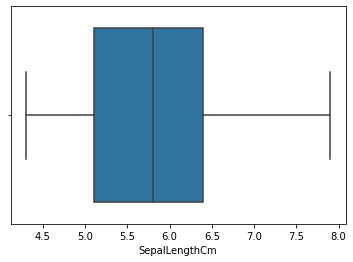

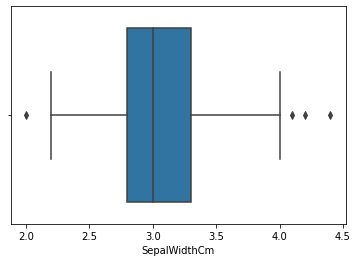

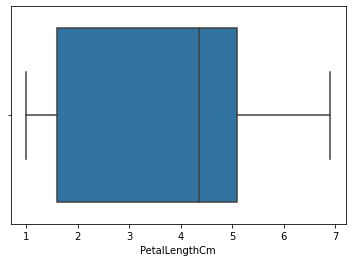

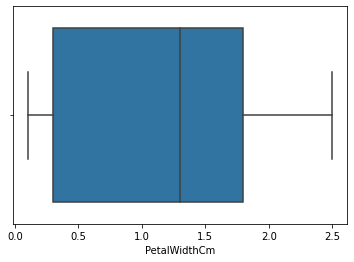

In [8]:
df_num=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in df_num:
    sns.boxplot(df[i])
    plt.show()

## Distribution Plot

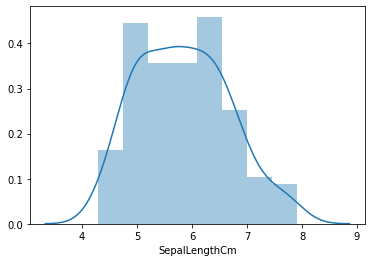

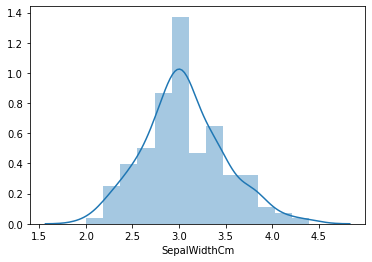

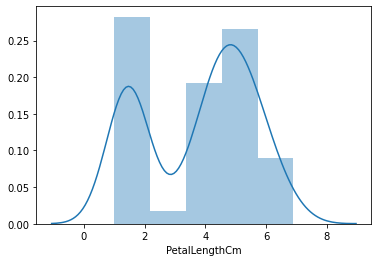

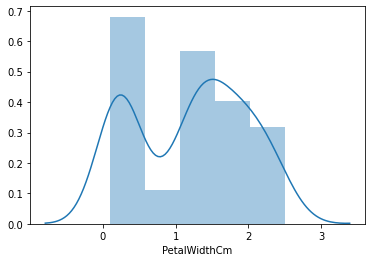

In [9]:
for i in df_num:
    sns.distplot(df[i])
    plt.show()

In [10]:
max_3rd=df['SepalWidthCm'].mean() + df['SepalWidthCm'].std()*3
max_3rd

4.354782934086521

In [11]:
min_3rd=df['SepalWidthCm'].mean() - df['SepalWidthCm'].std()*3
min_3rd

1.7532170659134791

In [12]:
df['SepalWidthCm']=np.where(df['SepalWidthCm']>=max_3rd,df['SepalWidthCm'],df['SepalWidthCm'].mean())
df['SepalWidthCm']=np.where(df['SepalWidthCm']<=min_3rd,df['SepalWidthCm'],df['SepalWidthCm'].mean())

In [13]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
spe_map={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Species']=df['Species'].map(spe_map)

/home/vivek/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/vivek/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/vivek/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


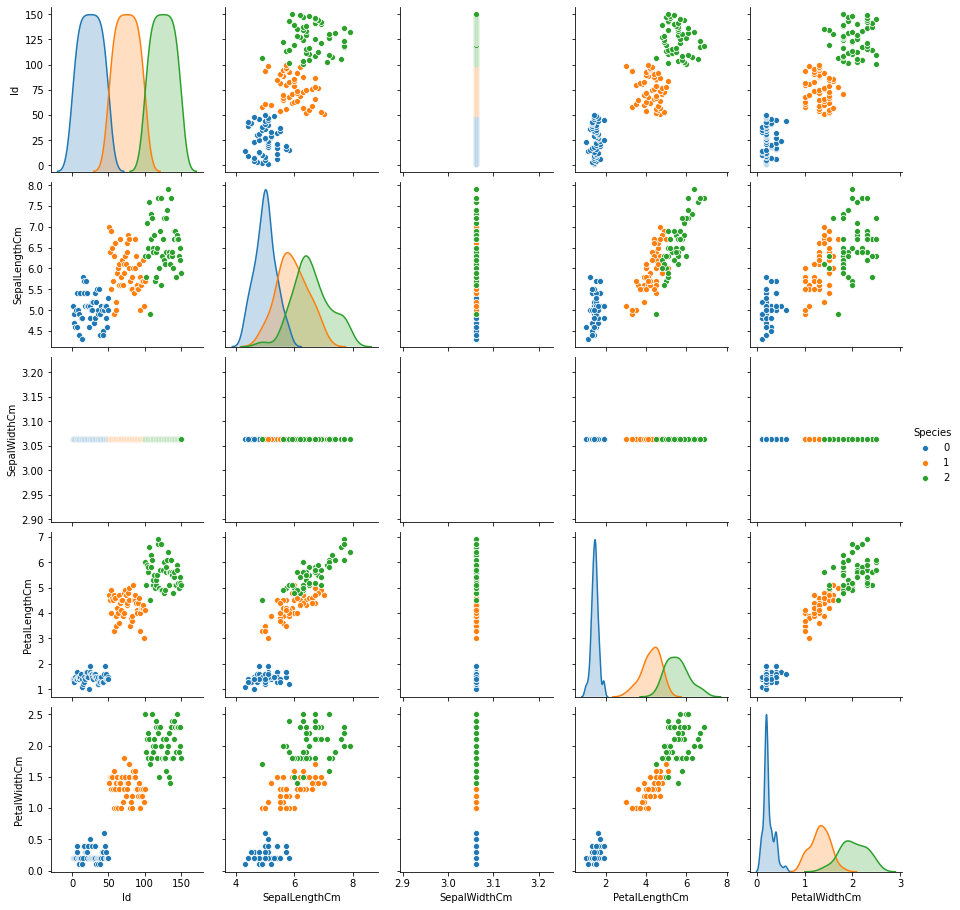

In [15]:
sns.pairplot(data=df,hue='Species',diag_kind='kde')

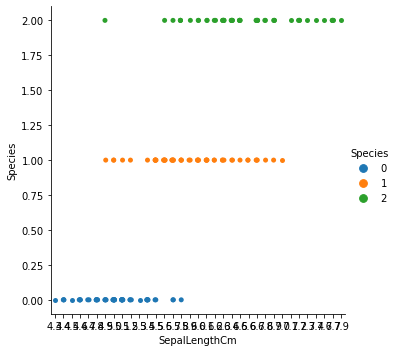

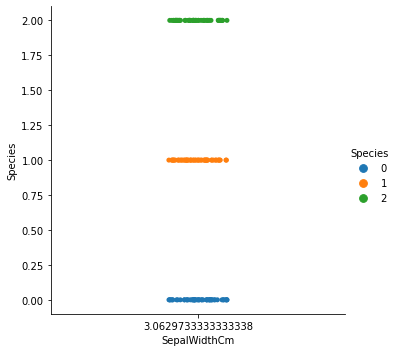

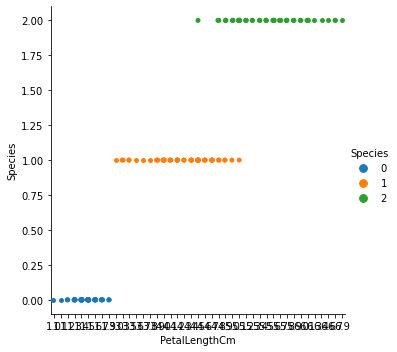

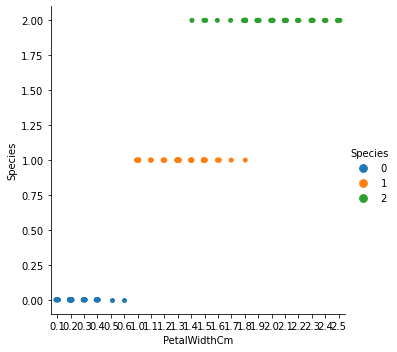

In [16]:
for i in df_num:
    sns.catplot(x=i,y='Species',data=df,hue='Species')
    plt.show()

## Correlation Plot

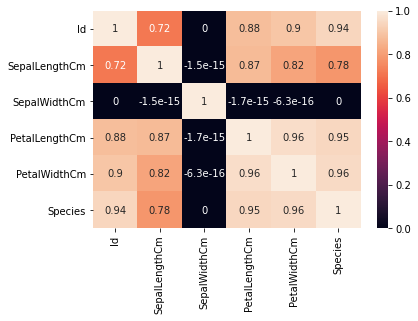

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [19]:
X=df.drop(['Species'],axis=1)

In [20]:
y=df['Species']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

## Model Creation

In [22]:
model=DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction

In [24]:
y_pred=model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.9666666666666667

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
score=cross_val_score(model,X,y,cv=5)

In [31]:
score

array([0.83333333, 1.        , 1.        , 1.        , 0.66666667])

In [32]:
from sklearn.tree import plot_tree

## Decision Tree Visualization

[Text(200.88000000000002, 181.2, 'X[0] <= 101.0\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 50.5\ngini = 0.5\nsamples = 76\nvalue = [39, 37, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]')]

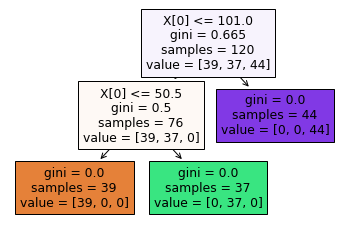

In [33]:
plot_tree(model,filled=True)